In [47]:
import json
import pandas as pd

# Chemin vers le fichier dans le dossier data
with open("data/autoscrap_FIN.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Créer le DataFrame
df = pd.DataFrame(data)

# Afficher les 5 premières lignes
df.head()


,nom_annonce,url_annonce,prix,annee,kilometrage,puissance_cv,carburant,boite_vitesse,code_postal
0,Peugeot 208,https://www.autosphere.fr/fiche-mixte/auto-occ...,16599,2022,57568,4,Electrique,Automatique,13
1,Renault Captur,https://www.autosphere.fr/fiche/auto-occasion-...,28499,2025,3088,5,Hybride,Automatique,51
2,Dacia Duster,https://www.autosphere.fr/fiche/auto-occasion-...,24299,2025,4130,5,Gpl,Manuelle,13
3,Nissan Qashqai,https://www.autosphere.fr/fiche4/auto-occasion...,23489,2022,13161,7,Essence,Manuelle,26
4,Peugeot 208,https://www.autosphere.fr/fiche-mixte/auto-occ...,15499,2023,36431,5,Essence,Automatique,79


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nom_annonce    3030 non-null   object
 1   url_annonce    3030 non-null   object
 2   prix           3030 non-null   int64 
 3   annee          3030 non-null   int64 
 4   kilometrage    3030 non-null   int64 
 5   puissance_cv   3030 non-null   int64 
 6   carburant      3030 non-null   object
 7   boite_vitesse  3030 non-null   object
 8   code_postal    3030 non-null   object
dtypes: int64(4), object(5)
memory usage: 213.2+ KB


In [61]:
df.describe()


,prix,annee,kilometrage,puissance_cv
count,3030.000000,3030.000000,3030.000000,3030.000000
mean,23654.869967,2021.915512,37434.760726,6.264356
std,14904.705794,3.570928,30787.695096,3.101520
min,5499.000000,2008.000000,0.000000,1.000000
25%,15279.250000,2021.000000,12427.500000,5.000000
50%,19554.000000,2023.000000,29523.500000,5.000000
75%,27607.250000,2024.000000,57510.000000,7.000000
max,309900.000000,2025.000000,170371.000000,47.000000


In [ ]:
import pandas as pd
import numpy as np

# Supposons que ton DataFrame s'appelle df
df = df.copy()  # pour ne pas modifier l'original directement

# Créer l'âge de la voiture
df['age_voiture'] = 2026 - df['annee']

# Identifier les outliers avec l'IQR (prix, kilometrage, puissance)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

outliers_prix = detect_outliers_iqr(df['prix'])
outliers_kilometrage = detect_outliers_iqr(df['kilometrage'])
outliers_puissance = detect_outliers_iqr(df['puissance_cv'])

print("Outliers prix :", outliers_prix.shape[0])
print("Outliers kilometrage :", outliers_kilometrage.shape[0])
print("Outliers puissance_cv :", outliers_puissance.shape[0])

# Nettoyer en retirant les outliers
df_clean = df[
    (~df['prix'].isin(outliers_prix)) &
    (~df['kilometrage'].isin(outliers_kilometrage)) &
    (~df['puissance_cv'].isin(outliers_puissance))
].copy()

print("\nAvant nettoyage :", df.shape)
print("Après nettoyage :", df_clean.shape)

# Convertir code_postal en int 
df_clean['code_postal'] = df_clean['code_postal'].astype(int)

# Statistiques descriptives après nettoyage
print("\nStatistiques après nettoyage :")
print(df_clean.describe())


Outliers prix : 161
Outliers kilometrage : 29
Outliers puissance_cv : 135

Avant nettoyage : (3030, 10)
Après nettoyage : (2790, 10)

Statistiques après nettoyage :
               prix        annee    kilometrage  puissance_cv  code_postal  \
count   2790.000000  2790.000000    2790.000000   2790.000000  2790.000000   
mean   21109.274552  2021.851254   36860.037634      5.796416    48.997849   
std     8075.404900     3.633006   29103.557272      1.550207    26.183441   
min     5499.000000  2008.000000       0.000000      2.000000     1.000000   
25%    14999.000000  2021.000000   13148.000000      5.000000    27.000000   
50%    18999.000000  2023.000000   29809.500000      5.000000    57.000000   
75%    25999.000000  2024.000000   56581.750000      7.000000    69.000000   
max    45999.000000  2025.000000  123684.000000     10.000000    94.000000   

       age_voiture  
count  2790.000000  
mean      4.148746  
std       3.633006  
min       1.000000  
25%       2.000000  
50%   

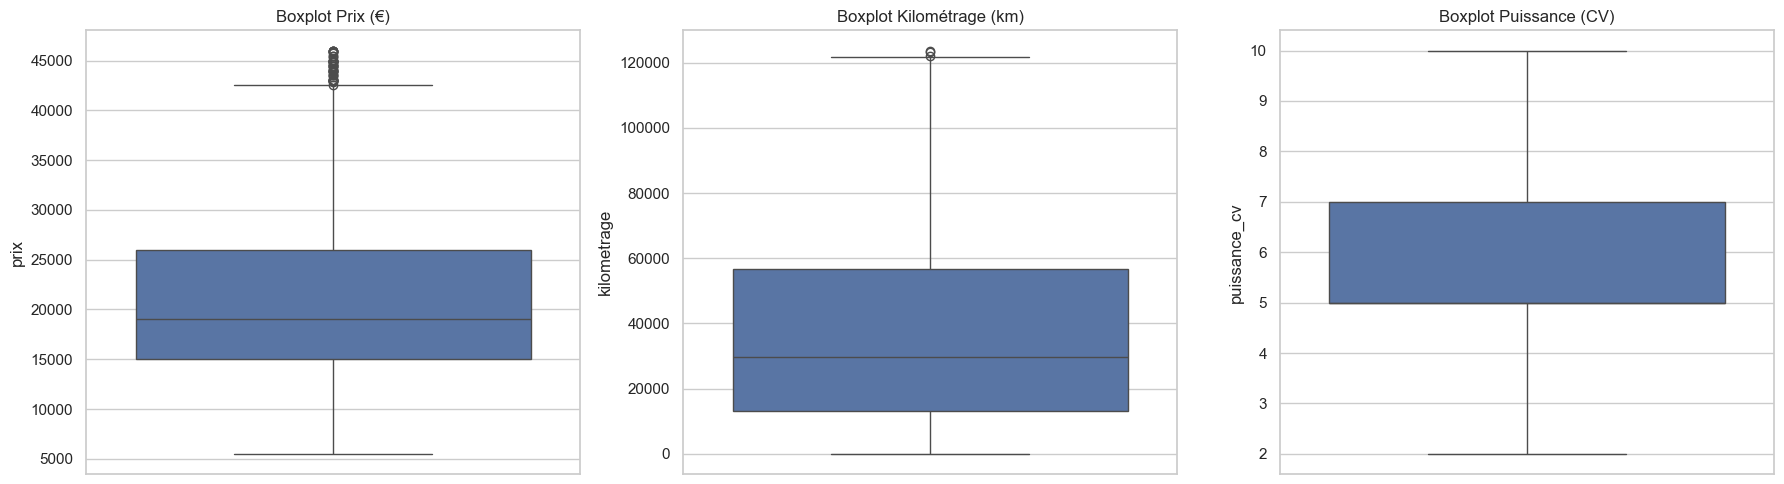

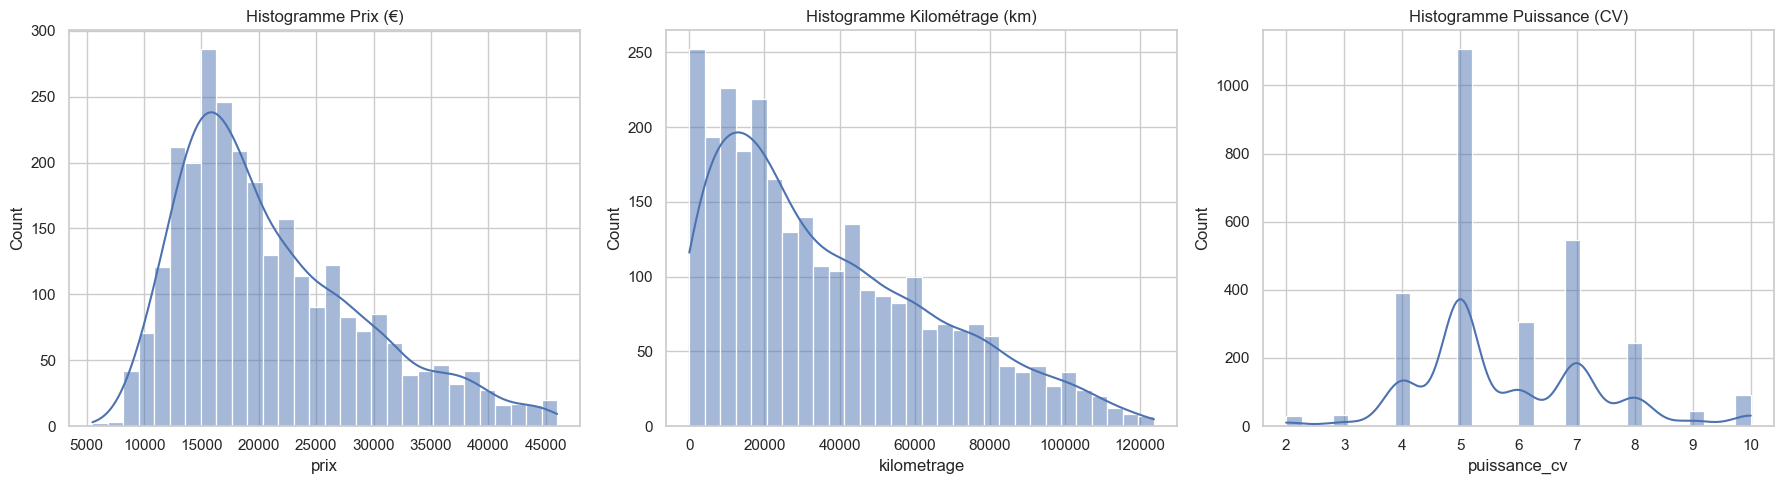

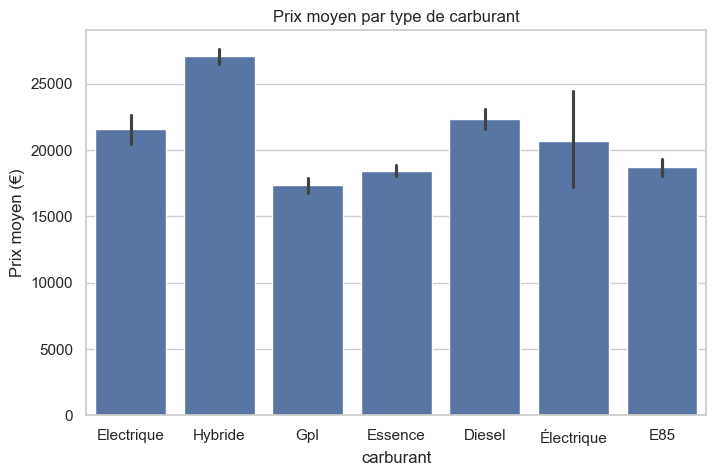

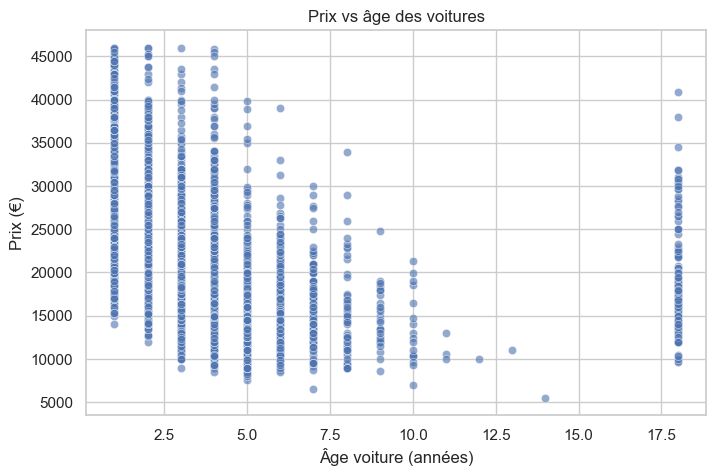

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer un style agréable
sns.set(style="whitegrid")

# Boxplots pour détecter les valeurs extrêmes
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(y=df_clean['prix'])
plt.title('Boxplot Prix (€)')

plt.subplot(1,3,2)
sns.boxplot(y=df_clean['kilometrage'])
plt.title('Boxplot Kilométrage (km)')

plt.subplot(1,3,3)
sns.boxplot(y=df_clean['puissance_cv'])
plt.title('Boxplot Puissance (CV)')

plt.tight_layout()
plt.show()

# Histogrammes pour voir la répartition
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(df_clean['prix'], bins=30, kde=True)
plt.title('Histogramme Prix (€)')

plt.subplot(1,3,2)
sns.histplot(df_clean['kilometrage'], bins=30, kde=True)
plt.title('Histogramme Kilométrage (km)')

plt.subplot(1,3,3)
sns.histplot(df_clean['puissance_cv'], bins=30, kde=True)
plt.title('Histogramme Puissance (CV)')

plt.tight_layout()
plt.show()

# Comparaison moyenne du prix par carburant
plt.figure(figsize=(8,5))
sns.barplot(x='carburant', y='prix', data=df_clean, estimator=np.mean)
plt.title('Prix moyen par type de carburant')
plt.ylabel('Prix moyen (€)')
plt.show()

# Prix moyen vs âge des voitures
plt.figure(figsize=(8,5))
sns.scatterplot(x='age_voiture', y='prix', data=df_clean, alpha=0.6)
plt.title('Prix vs âge des voitures')
plt.xlabel('Âge voiture (années)')
plt.ylabel('Prix (€)')
plt.show()


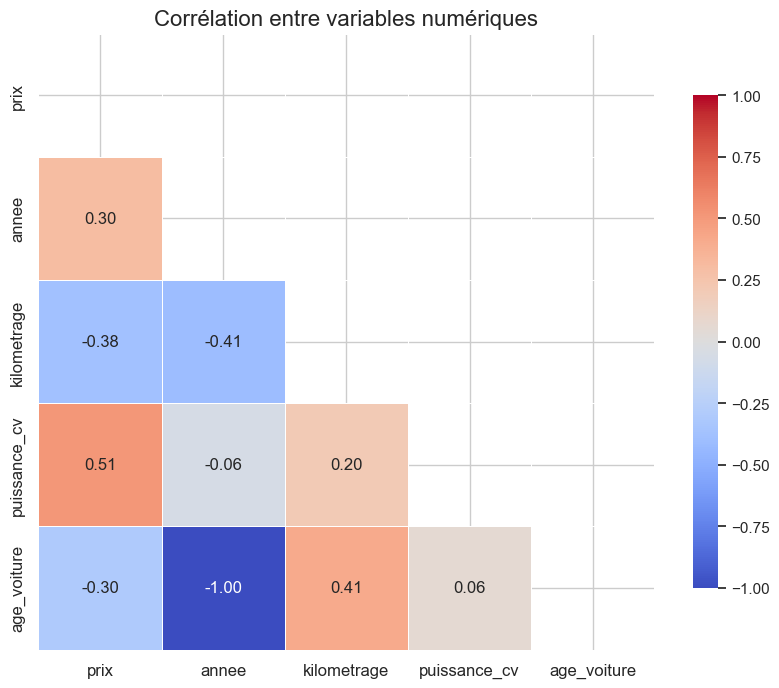

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,8))

# Calcul de la corrélation
corr = df_clean[['prix','annee','kilometrage','puissance_cv','age_voiture']].corr()

# Masque pour la moitié supérieure
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, 
    annot=True,           # afficher les valeurs
    fmt=".2f",            # format 2 décimales
    cmap="coolwarm",      # palette rouge-bleu
    vmin=-1, vmax=1,      # contraste fixe pour corrélation [-1,1]
    mask=mask,            # cacher moitié supérieure
    square=True,          # carré
    linewidths=0.5,       # lignes séparatrices
    cbar_kws={"shrink":0.8}  # réduire la taille de la barre de couleur
)

plt.title("Corrélation entre variables numériques", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


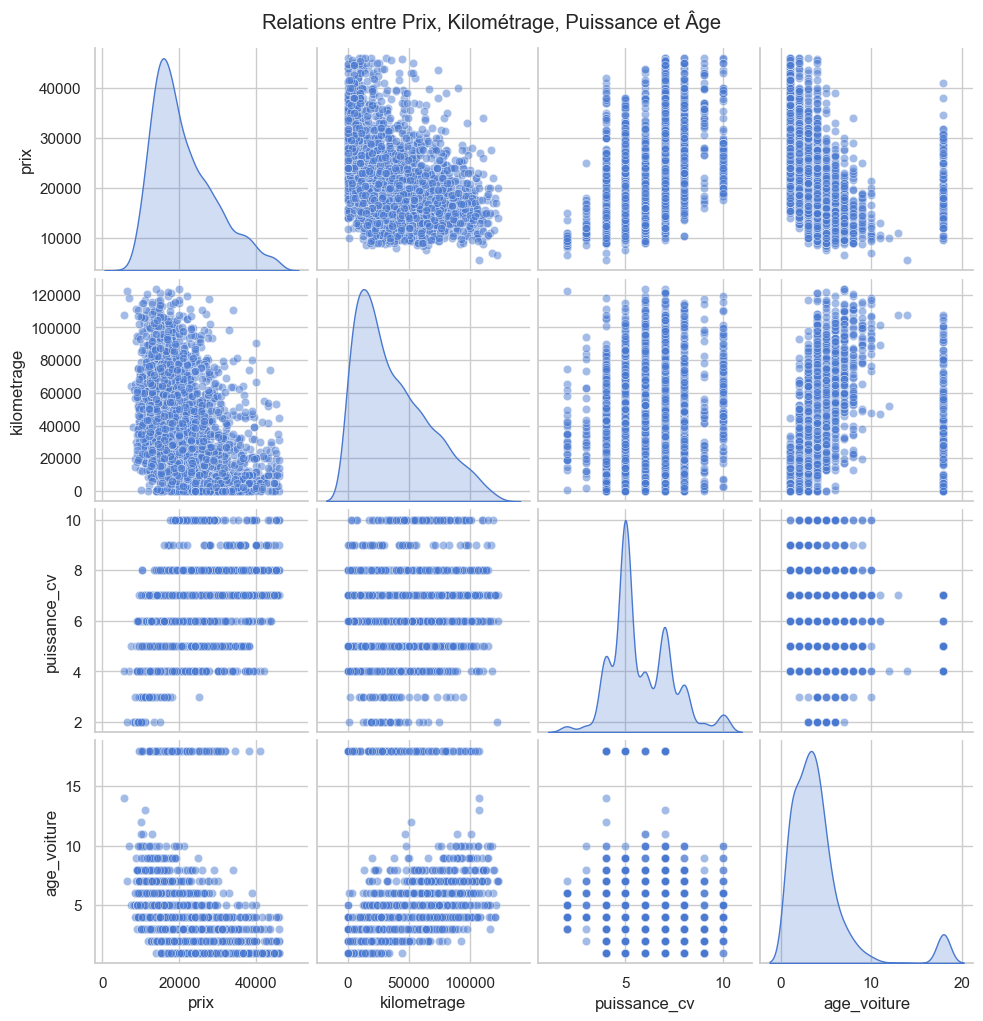

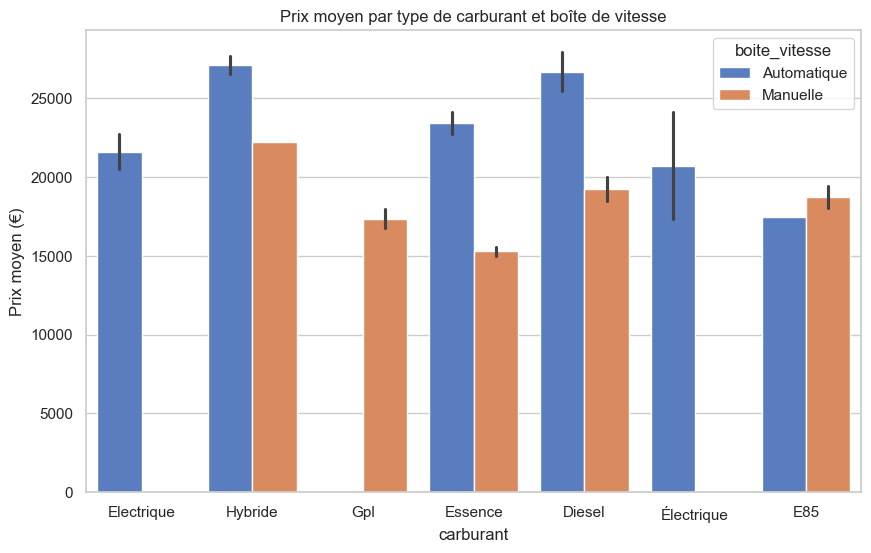

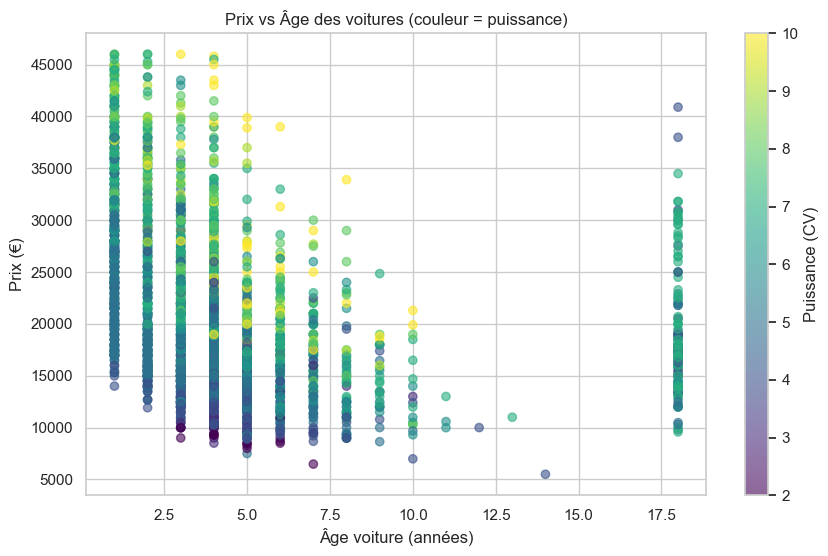

In [69]:

import seaborn as sns


sns.set(style="whitegrid", palette="muted")


# Pairplot pour visualiser relations bivariées
sns.pairplot(df_clean[['prix','kilometrage','puissance_cv','age_voiture']], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Relations entre Prix, Kilométrage, Puissance et Âge", y=1.02)
plt.show()

# Prix moyen par carburant et boîte de vitesse (double regroupement)
plt.figure(figsize=(10,6))
sns.barplot(x='carburant', y='prix', hue='boite_vitesse', data=df_clean, estimator=np.mean)
plt.title("Prix moyen par type de carburant et boîte de vitesse")
plt.ylabel("Prix moyen (€)")
plt.show()

# Prix vs âge avec puissance en couleur (scatter plot amélioré)
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_clean['age_voiture'], df_clean['prix'], c=df_clean['puissance_cv'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Puissance (CV)')
plt.title("Prix vs Âge des voitures (couleur = puissance)")
plt.xlabel("Âge voiture (années)")
plt.ylabel("Prix (€)")
plt.show()


In [71]:
# Exporter le DataFrame nettoyé en CSV
df_clean.to_csv("data/autoscrap_FIN_clean.csv", index=False, encoding="utf-8-sig", sep=";")

print("Le fichier CSV a été créé avec succès !")


Le fichier CSV a été créé avec succès !
